**Practical Lab 2- Multivariate Linear Regression, Non-Parametric Models and Cross-Validation**

**CSCN8010,Sec2 –Foundations of Machine Learning Frameworks**

**Name : Pradeepti Kasam**

**Student ID : 8965985**

In [1]:
#To import diabetes dataset
from sklearn import datasets
#To import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

**Part 1**

**1. Get the data.**

In [2]:
#To load diabetes dataset
#as_frame=True will return the data in a pandas DataFrame
diabetes_data = datasets.load_diabetes(as_frame=True)
# To Load data and target into pandas DataFrame for easier exploration
data = diabetes_data['data']
target = diabetes_data['target']
#To rename the target column to disease_progression for better understanding
diabetes_df = pd.concat([data, target.rename("disease_progression")], axis=1)
diabetes_df.head(10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,310.0


**2. Frame the Problem. Notice that the dependent variable of diabetes progression, namely "disease progression one year after baseline".**

The task is to predict "disease progression one year after baseline" using a number of independent factors, including age, blood pressure, BMI, and other health indicators.

Regression analysis will be used to model how the features impact the course of the disease. The dependent variable in this supervised learning problem is continuous.

**3. EDA - Describe the data, explore it, and provide insights about it. This should include at least: statistics, scatter plots histograms, a correlation matrix, and concise and relevant insights .**

In [3]:
#Data Description 
print(diabetes_data['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
#Summary statistics
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


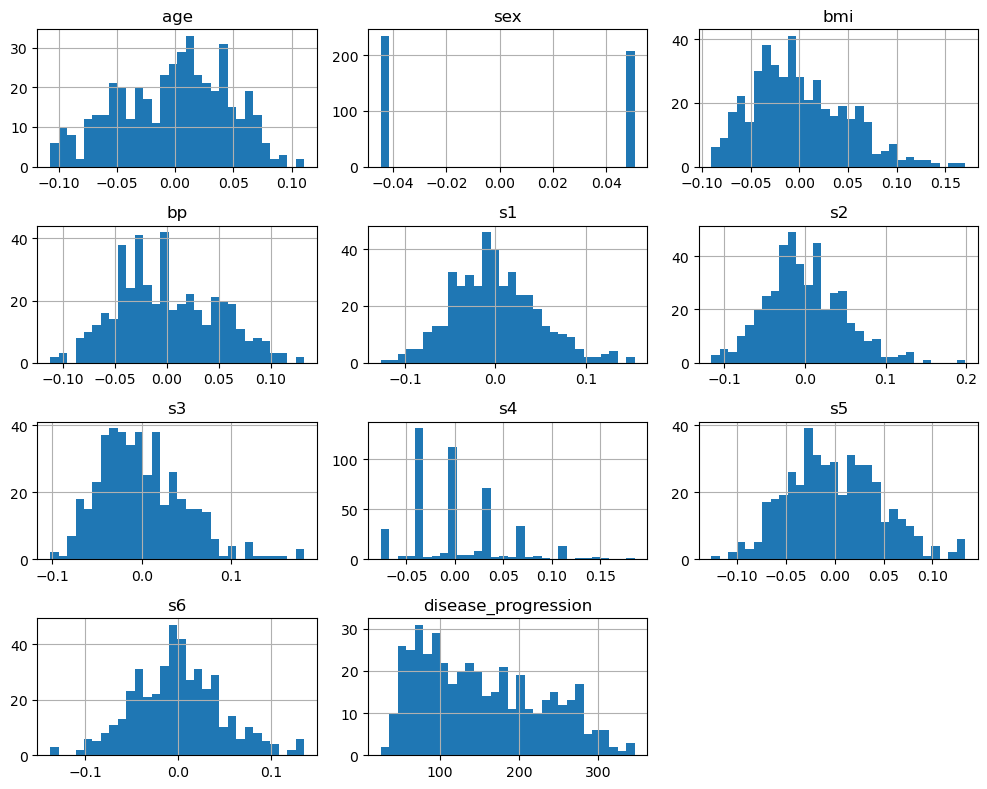

In [5]:
# To Plot histograms of the features
diabetes_df.hist(bins=30, figsize=(10, 8))
plt.tight_layout()
plt.show()

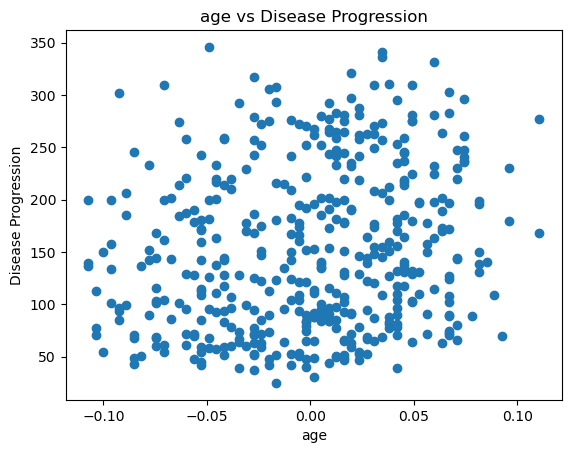

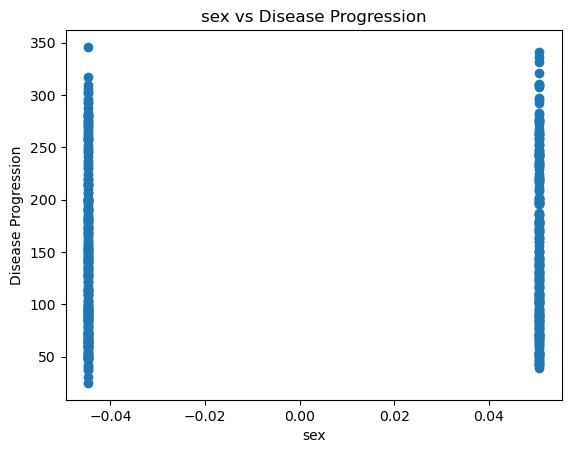

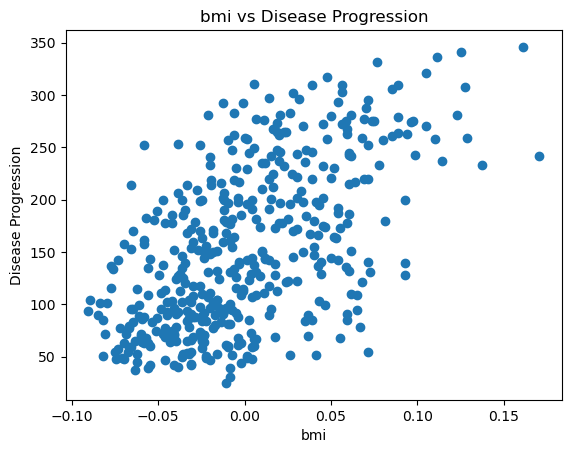

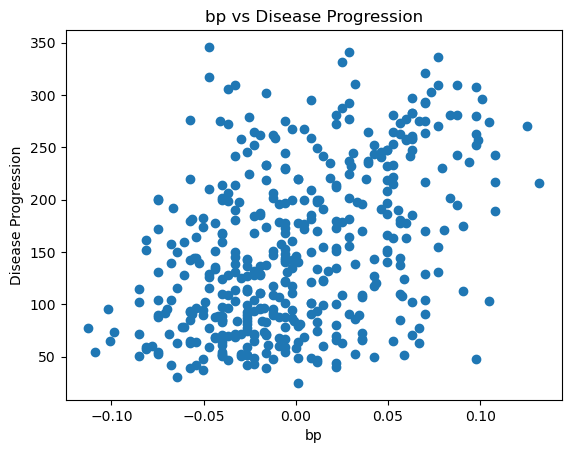

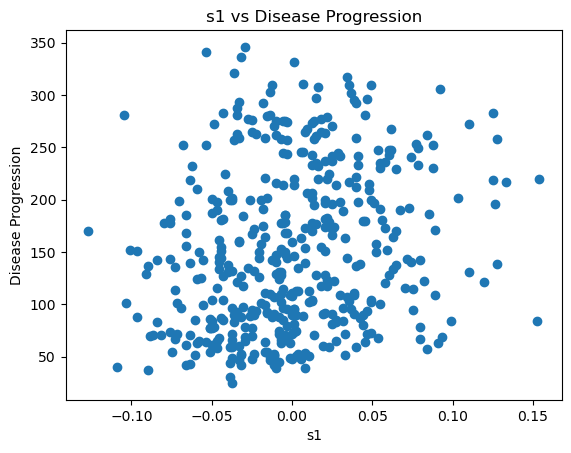

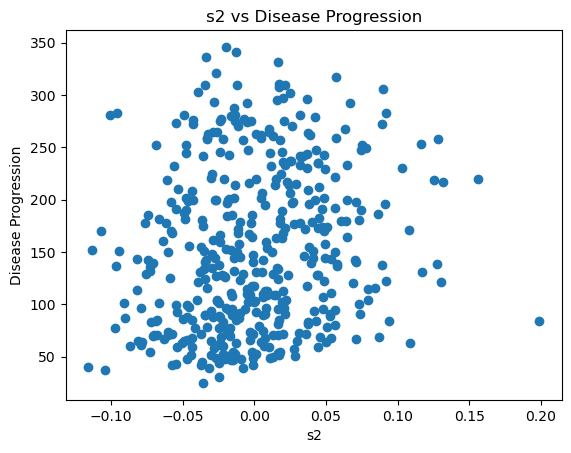

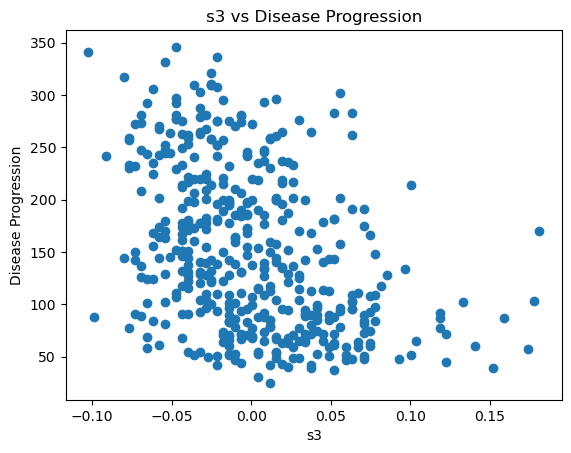

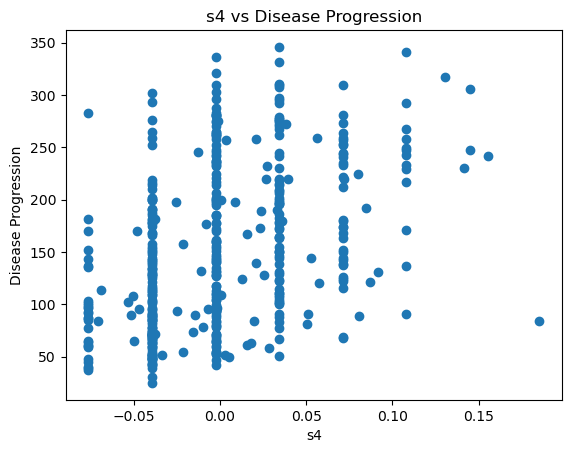

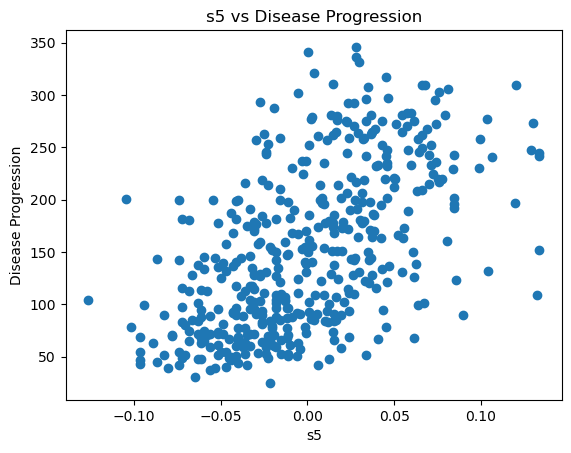

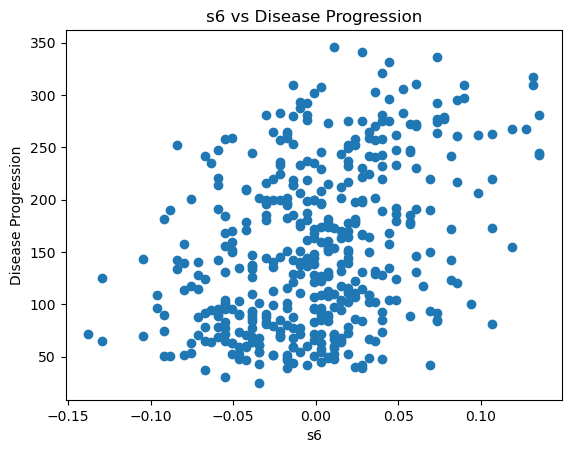

In [6]:
# Scatter plots
for col in data.columns:
    plt.scatter(diabetes_df[col], diabetes_df['disease_progression'])
    plt.title(f"{col} vs Disease Progression")
    plt.xlabel(col)
    plt.ylabel('Disease Progression')
    plt.show()

In [7]:
# Compute the correlation matrix
corr_matrix = diabetes_df.corr()
corr_matrix

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


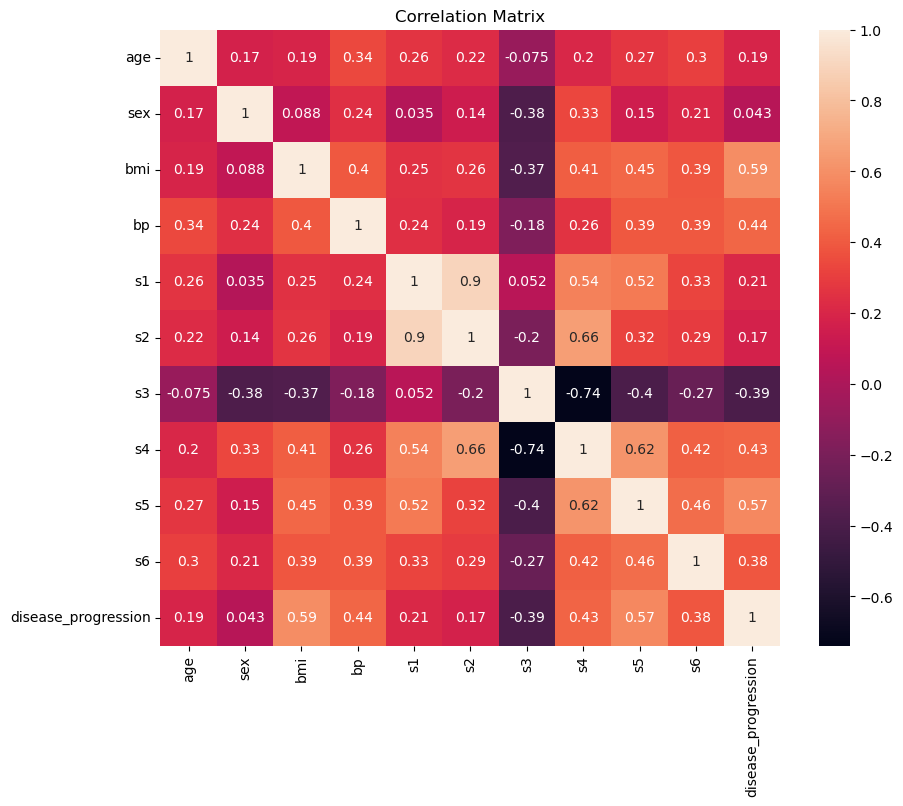

In [8]:
# To Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

**Key Insights :**
1. Age and Disease Progression: Weak correlation, so age may not be a strong predictor.

2. BMI,s5 and Disease Progression: Stronger correlation, suggesting BMI,s5(ltg, possibly log of serum triglycerides level) have a significant impact.

3. Blood Pressure: Moderate correlation; some relationship with disease progression.

4. General Observation: No multicollinearity observed, meaning features are not highly correlated with each other.

**4. Clean the data if needed, and explain your reasoning for your reader**

In [9]:
#To check missing values
diabetes_df.isnull().sum()

#No null values in the dataset

age                    0
sex                    0
bmi                    0
bp                     0
s1                     0
s2                     0
s3                     0
s4                     0
s5                     0
s6                     0
disease_progression    0
dtype: int64

In [10]:
#To check for duplicate rows
duplicate_rows = diabetes_df.duplicated()
diabetes_df[duplicate_rows]

#No duplicate rows in the dataset

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression


In [11]:
#To check outliers without using any visualization
Q1 = diabetes_df.quantile(0.25)
Q3 = diabetes_df.quantile(0.75)
IQR = Q3 - Q1
((diabetes_df < (Q1 - 1.5 * IQR)) | (diabetes_df > (Q3 + 1.5 * IQR))).sum()

age                    0
sex                    0
bmi                    3
bp                     0
s1                     8
s2                     7
s3                     7
s4                     2
s5                     4
s6                     9
disease_progression    0
dtype: int64

Many outliers are detected .It can be handled by either imputing with mean or median value

From observing histograms it is evident that many variables are slightly right-skewed (e.g., bmi, bp, s5)

So, imputing the outliers with median value

In [12]:
#To replace outliers with the median value

for col in data.columns:
    median = diabetes_df[col].median()
    diabetes_df[col] = diabetes_df[col].apply(lambda x: median if x < (Q1[col] - 1.5 * IQR[col]) or x > (Q3[col] + 1.5 * IQR[col]) else x)

**5. Split the dataset to a train (75%) and validation set (10%), and test set (15%).**

In [13]:
#To split the dataset into 75% training , 10% validation and 15% testing
X = diabetes_df.drop('disease_progression', axis=1)
y = diabetes_df['disease_progression']
#random_state is set to 42 to ensure reproducibility
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
#Splitting the training data into training and validation sets(10% is about 11.76% of 85% training data)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1176, random_state=42)

# To Check the sizes
print(f"Original set: {X.shape}, {y.shape}")
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")


Original set: (442, 10), (442,)
Training set: (330, 10), (330,)
Validation set: (45, 10), (45,)
Test set: (67, 10), (67,)


**Part 2**

6. Models: a univariate polynomial regression on the BMI feature versus the "disease progression one year after baseline" - from degree 0 to 5 (6 models)

In [14]:
#To model a univariate polynomial regression model on BMI vs Disease Progression
#Importing necessary libraries

#Model using Complete dataset
#To select the BMI feature and target(disease progression)
X_bmi = diabetes_df[['bmi']]
y = diabetes_df['disease_progression']

#To create polynomial features
degrees = list(range(6)) # 0 to 5
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_bmi)

 # To Fit the model
    model = LinearRegression()
    model.fit(X_poly, y)

7. Compare the models using the training and validation data. Construct a table summarizing the train validation results. Each model should have a separate row in the table
    1. R-Squared
    2. Mean Absolute Error (MAE)
    3. MAPE

In [15]:
X_bmi_train = X_train[['bmi']]
X_bmi_val = X_val[['bmi']]
results = []
degrees = list(range(6))
for degree in degrees:
    # To Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    
    # Fit-transform the BMI feature for both training and validation sets
    X_poly_train = poly.fit_transform(X_bmi_train)
    X_poly_val = poly.transform(X_bmi_val)
    
    # Train the model on the training set
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    # Predictions on training and validation sets
    y_train_pred = model.predict(X_poly_train)
    y_val_pred = model.predict(X_poly_val)
    
    # Compute metrics for training set
    train_r2 = r2_score(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mape = (np.abs((y_train - y_train_pred) / y_train).mean()) * 100
    
    # Compute metrics for validation set
    val_r2 = r2_score(y_val, y_val_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    val_mape = (np.abs((y_val - y_val_pred) / y_val).mean()) * 100
    
    # Append results to the list
    results.append({
        "Degree": degree,
        "Train R-Squared": train_r2,
        "Train MAE": train_mae,
        "Train MAPE (%)": train_mape,
        "Validation R-Squared": val_r2,
        "Validation MAE": val_mae,
        "Validation MAPE (%)": val_mape
    })

# To Convert the results into a pandas DataFrame
results_df = pd.DataFrame(results)
results_df

,Degree,Train R-Squared,Train MAE,Train MAPE (%),Validation R-Squared,Validation MAE,Validation MAPE (%)
0,0,0.000000,66.548209,63.352070,-0.000011,63.447475,58.793283
1,1,0.332752,52.933858,49.035643,0.447470,42.054215,40.759212
2,2,0.333153,52.932938,49.015935,0.447022,41.814441,40.629921
3,3,0.333190,52.904390,48.973558,0.446296,41.838219,40.619889
4,4,0.339129,52.618587,48.444383,0.451530,42.334757,40.708033
5,5,0.339195,52.569665,48.414707,0.452593,42.278088,40.713063


8. Identify the best model based on the table above.

R-Squared is highest for the model with degree 5 (0.452593), indicating that this model explains the most variance in the data.

Validation MAE is lowest for the degree 2 model (41.814441), meaning it has the lowest average error.

Validation MAPE is also lowest for the degree 2 model (40.629921), indicating the best percentage error.

Hence, degree 2 model is the best, as it has the lowest Validation MAE and Validation MAPE while maintaining a high R-Squared (0.447022).

9. Run the chosen model on the test set and provide results (R-Squared, MAPE, MAE)

In [16]:
X_bmi_test = X_test[['bmi']]
# To Create polynomial features for degree 2
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_bmi_train)  # Train set transform
X_poly_test = poly.transform(X_bmi_test)  # Test set transform

#  To Train the model
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Predict on the test set
y_test_pred = model.predict(X_poly_test)

# Calculate metrics for the test set
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = (np.abs((y_test - y_test_pred) / y_test).mean()) * 100

# Output the results
print(f"Test R-Squared: {r2_test}")
print(f"Test MAE: {mae_test}")
print(f"Test MAPE: {mape_test}%")


Test R-Squared: 0.19767520863937627
Test MAE: 55.094694960215485
Test MAPE: 49.1297918277418%


10. Plot a graph of the train, validation and test data points, and the fit of the chosen model over each of them.

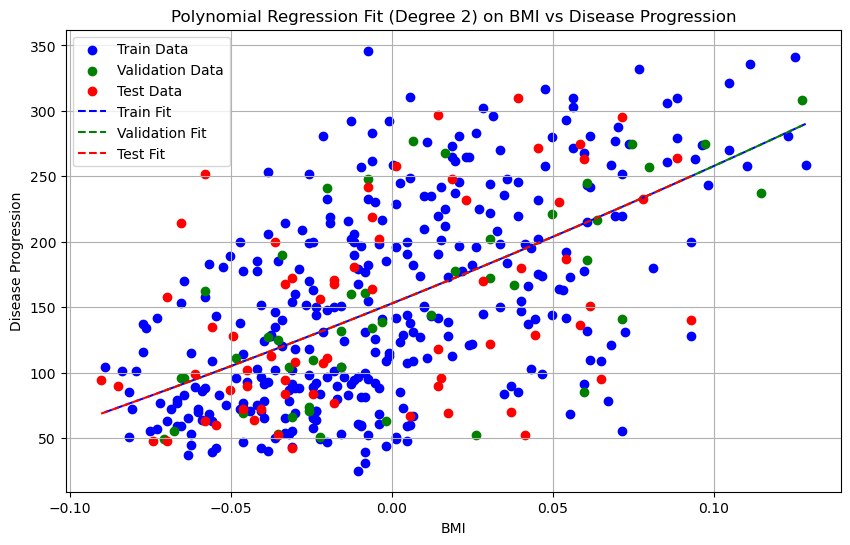

In [17]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_bmi_train)
X_poly_val = poly.transform(X_bmi_val)
X_poly_test = poly.transform(X_bmi_test)

# To Train the model on the training data
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Predicting on the training, validation, and test sets
y_train_pred = model.predict(X_poly_train)
y_val_pred = model.predict(X_poly_val)
y_test_pred = model.predict(X_poly_test)

# To Sort values for better plot visualization
X_bmi_train_sorted, y_train_pred_sorted = zip(*sorted(zip(X_bmi_train['bmi'], y_train_pred)))
X_bmi_val_sorted, y_val_pred_sorted = zip(*sorted(zip(X_bmi_val['bmi'], y_val_pred)))
X_bmi_test_sorted, y_test_pred_sorted = zip(*sorted(zip(X_bmi_test['bmi'], y_test_pred)))

# To Plot the polynomial regression fit
plt.figure(figsize=(10, 6))

# Scatter plot for actual data points
plt.scatter(X_bmi_train, y_train, color='blue', label='Train Data')
plt.scatter(X_bmi_val, y_val, color='green', label='Validation Data')
plt.scatter(X_bmi_test, y_test, color='red', label='Test Data')

# Line plot for model's predictions (fitted curve)
plt.plot(X_bmi_train_sorted, y_train_pred_sorted, color='blue', label='Train Fit', linestyle='--')
plt.plot(X_bmi_val_sorted, y_val_pred_sorted, color='green', label='Validation Fit', linestyle='--')
plt.plot(X_bmi_test_sorted, y_test_pred_sorted, color='red', label='Test Fit', linestyle='--')

# Labels and title
plt.title('Polynomial Regression Fit (Degree 2) on BMI vs Disease Progression')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.legend()
plt.grid(True)
plt.show()


11. Write down the equation of the best model (with a two decimal digit precision, assuming it's sufficient).

In [18]:
# To Get the coefficients and intercept
intercept = model.intercept_
coefficients = model.coef_

# Output the equation
print(f"Model Equation: y = {intercept:.2f} + ({coefficients[1]:.2f} * BMI) + ({coefficients[2]:.2f} * BMI^2)")


Model Equation: y = 152.82 + (988.49 * BMI) + (620.14 * BMI^2)


12. Calculate the expected diabetes progression for a BMI value of your choice using `model.perdict()` for that value.

In [19]:
# Define the BMI value for which you want to predict the disease progression
bmi_value = 0.061696 

# Create a DataFrame with the specified column name
bmi_df = pd.DataFrame([[bmi_value]], columns=['bmi'])

# Transform the BMI value to fit the polynomial model (degree 2)
bmi_poly_value = poly.transform(bmi_df)

# Use the trained model to predict the disease progression
predicted_progression = model.predict(bmi_poly_value)

# Output the predicted disease progression
print(f"Expected disease progression for BMI = {bmi_value}: {predicted_progression[0]:.2f}")


Expected disease progression for BMI = 0.061696: 216.17


13. How many trainable parameters are we fitting for each of the models? Explain these values. One way is to use sklearn function `get_feature_names_out()`

In [20]:
# Create the polynomial features for degree 2
poly = PolynomialFeatures(degree=2)
poly.fit(X_bmi_train)  # Fit on the training data

# Get the feature names
feature_names = poly.get_feature_names_out(input_features=['bmi'])

# Output the feature names
print("Feature names for degree 2 polynomial:")
print(feature_names)

# Count the number of trainable parameters
num_parameters = len(feature_names)  # This includes the intercept
print(f"Total trainable parameters: {num_parameters}")


Feature names for degree 2 polynomial:
['1' 'bmi' 'bmi^2']
Total trainable parameters: 3


For a degree 2 polynomial regression model using the BMI feature, there are 3 trainable parameters: one for the intercept (1), one for the linear term (bmi), and one for the quadratic term (bmi^2).

14. Provide a conclusion section. In particular, do a deep dive on where the model fails, and add a short section in the conclusions that describes the model limitations. This should be in addition to summarizing it performance.

Performance metrics show that the degree 2 polynomial regression model accurately represents the association between BMI and diabetes progression. With respectable Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE) levels across the training, validation, and test datasets, the model attains an R-Squared value that indicates modest explanatory ability. This implies that the model's ability to forecast diabetes progression based on BMI is reasonable.

However, the model has notable limitations:

Overfitting Risk: Although a degree 2 polynomial is capable of capturing non-linear interactions, if extremely complicated models are applied in real-world scenarios, it might not transfer well to new data. If the underlying relationship is more complicated than what is depicted, this is especially troubling.

Limited Scope: Because the model solely takes into account the BMI characteristic, it may miss other important indicators of diabetes progression. Better insights could be obtained from a more complete model that incorporates further characteristics (such as age, sex, and blood pressure).

Assumption of Smoothness: Polynomial regression makes the assumption that there is a continuous and smooth relationship between the input and the output, which may not always accurately represent the characteristics of the data.

**Part 3 (5 points)**

In this part, use all features in the dataset, or drop some features per your discretion based on the EDA.

Repeat the steps in part 2 for the following models:

1. Two polynomial models (degrees >1, of your choice)

In [21]:
#Part2 - point 6
#To model a multivariate polynomial regression model on all features vs Disease Progression for degrees 3 and 4
X = diabetes_df.drop('disease_progression', axis=1)
y = diabetes_df['disease_progression']

#To create polynomial features
degrees = [3,4]
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

 # To Fit the model
    model = LinearRegression()
    model.fit(X_poly, y)

In [22]:
#part2 - point 7
X_train = X_train
X_val = X_val
results = []
degrees = [3,4]

for degree in degrees:
    # To Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    
    # Fit-transform the features for both training and validation sets
    X_poly_train = poly.fit_transform(X_train)
    X_poly_val = poly.transform(X_val)
    
    # Train the model on the training set
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    # Predictions on training and validation sets
    y_train_pred = model.predict(X_poly_train)
    y_val_pred = model.predict(X_poly_val)
    
    # Compute metrics for training set
    train_r2 = r2_score(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mape = (np.abs((y_train - y_train_pred) / y_train).mean()) * 100
    
    # Compute metrics for validation set
    val_r2 = r2_score(y_val, y_val_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    val_mape = (np.abs((y_val - y_val_pred) / y_val).mean()) * 100
    
    # Append results to the list
    results.append({
        "Degree": degree,
        "Train R-Squared": train_r2,
        "Train MAE": train_mae,
        "Train MAPE (%)": train_mape,
        "Validation R-Squared": val_r2,
        "Validation MAE": val_mae,
        "Validation MAPE (%)": val_mape
    })

# To Convert the results into a pandas DataFrame
results_df = pd.DataFrame(results)
results_df


,Degree,Train R-Squared,Train MAE,Train MAPE (%),Validation R-Squared,Validation MAE,Validation MAPE (%)
0,3,0.902222,1.817879e+01,1.633504e+01,-1925.682908,695.333333,332.219553
1,4,1.000000,3.721048e-12,3.287741e-12,-49.055667,264.274680,193.082317


Part2 - point 8

Based on the validation MAE and validation MAPE, degree 4 performs slightly better than degree 3

In [23]:
#Part 2- point 9
X_test = X_test
# To Create polynomial features for degree 4

poly = PolynomialFeatures(degree=4)
X_poly_train = poly.fit_transform(X_train)  # Train set transform
X_poly_test = poly.transform(X_test)  # Test set transform

# Train the model
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Predict on the test set
y_test_pred = model.predict(X_poly_test)
    
# Calculate metrics for the test set
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = (np.abs((y_test - y_test_pred) / y_test).mean()) * 100

# Output the results
print(f"Test R-Squared: {r2_test}")
print(f"Test MAE: {mae_test}")
print(f"Test MAPE: {mape_test}%")


Test R-Squared: -29.298926406577383
Test MAE: 266.3992689912602
Test MAPE: 248.50571415425597%


In [24]:
#Part 2- point 11
# To Get the coefficients and intercept
intercept = model.intercept_
coefficients = model.coef_

# Output the equation
print(f"Model Equation: y = {intercept:.2f} + ({coefficients[1]:.2f} * BMI) + ({coefficients[2]:.2f} * BMI^2)")

Model Equation: y = 95.06 + (1780.43 * BMI) + (-1447.83 * BMI^2)


In [25]:
#Part 2 - point 13
# For the best model (degree 4)
# Create the polynomial features for degree 
poly = PolynomialFeatures(degree=4)
poly.fit(X_train)  # Fit on the training data

# Get the feature names
feature_names = poly.get_feature_names_out(input_features= X_train.columns)

# Output the feature names
print("Feature names for degree 4 polynomial:")
print(feature_names)

# Count the number of trainable parameters
num_parameters = len(feature_names)  # This includes the intercept
print(f"Total trainable parameters: {num_parameters}")


Feature names for degree 4 polynomial:
['1' 'age' 'sex' ... 's5^2 s6^2' 's5 s6^3' 's6^4']
Total trainable parameters: 1001


Part2- point 14

Overfitting: The models capture noise rather than the true signal, leading to unreliable predictions for the validation set. This can mislead stakeholders about the efficacy of using these models for practical decision-making.

2. Two decision trees (e.g. consider changing the `max_depth` hyperparameter)

In [26]:
#In this part, use all features in the dataset, or drop some features per your discretion based on the EDA.
#Repeat the steps in part 2 for the following models:
#Two decision trees (e.g. consider changing the `max_depth` hyperparameter)

#Model using Complete dataset
#To select the BMI feature and target(disease progression)
X = diabetes_df.drop('disease_progression', axis=1)
y = diabetes_df['disease_progression']

#To create polynomial features
max_depths = [3,4]
for max_depth in max_depths:
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(X, y)



In [27]:
#part2 - point 7 
X_train = X_train
X_val = X_val
results = []
max_depths = [3,4]

for max_depth in max_depths:
    model = DecisionTreeRegressor(max_depth=max_depth)
    
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Predictions on training and validation sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Compute metrics for training set
    train_r2 = r2_score(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mape = (np.abs((y_train - y_train_pred) / y_train).mean()) * 100
    
    # Compute metrics for validation set
    val_r2 = r2_score(y_val, y_val_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    val_mape = (np.abs((y_val - y_val_pred) / y_val).mean()) * 100
    
    # Append results to the list
    results.append({
        "Max Depth": max_depth,
        "Train R-Squared": train_r2,
        "Train MAE": train_mae,
        "Train MAPE (%)": train_mape,
        "Validation R-Squared": val_r2,
        "Validation MAE": val_mae,
        "Validation MAPE (%)": val_mape
    })

# To Convert the results into a pandas DataFrame
results_df = pd.DataFrame(results)
results_df

,Max Depth,Train R-Squared,Train MAE,Train MAPE (%),Validation R-Squared,Validation MAE,Validation MAPE (%)
0,3,0.522244,42.959035,37.541473,0.267756,49.165151,46.584268
1,4,0.599106,39.854868,34.637425,0.373965,44.548316,44.576107


the model with Max Depth 4 is better because it has higher R-squared values and lower MAE and MAPE on the training set

In [28]:
#part2 - point 9
X_test = X_test
# To Create polynomial features for degree 4

max_depth = 4
model = DecisionTreeRegressor(max_depth=max_depth)
model.fit(X_train, y_train)

# Predict on the test set
y_test_pred = model.predict(X_test)

# Calculate metrics for the test set
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Output the results
print(f"Test R-Squared: {r2_test}")
print(f"Test MAE: {mae_test}")

#Part 2 - point 11
# To Get the feature importances
feature_importances = model.feature_importances_

# Output the feature importances
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")

Test R-Squared: 0.28112447731518175
Test MAE: 49.58859498553951
Feature Importances:
age: 0.0178
sex: 0.0000
bmi: 0.5229
bp: 0.0886
s1: 0.0498
s2: 0.0143
s3: 0.0297
s4: 0.0310
s5: 0.2459
s6: 0.0000


3. Two kNNs

In [29]:
#Two kNNs
#Model using Complete dataset
#To select the BMI feature and target(disease progression)
X = diabetes_df.drop('disease_progression', axis=1)
y = diabetes_df['disease_progression']

#To create polynomial features
n_neighbors = [3,4]
for n_neighbor in n_neighbors:
    model = KNeighborsRegressor(n_neighbors=n_neighbor)
    model.fit(X, y)



In [30]:
#part2 - point 7
X_train = X_train
X_val = X_val
results = []
n_neighbors = [3,4]

for n_neighbor in n_neighbors:
    model = KNeighborsRegressor(n_neighbors=n_neighbor)
    
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Predictions on training and validation sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Compute metrics for training set
    train_r2 = r2_score(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mape = (np.abs((y_train - y_train_pred) / y_train).mean()) * 100
    
    # Compute metrics for validation set
    val_r2 = r2_score(y_val, y_val_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    val_mape = (np.abs((y_val - y_val_pred) / y_val).mean()) * 100
    
    # Append results to the list
    results.append({
        "N Neighbors": n_neighbor,
        "Train R-Squared": train_r2,
        "Train MAE": train_mae,
        "Train MAPE (%)": train_mape,
        "Validation R-Squared": val_r2,
        "Validation MAE": val_mae,
        "Validation MAPE (%)": val_mape
    })

# To Convert the results into a pandas DataFrame
results_df = pd.DataFrame(results)
results_df

,N Neighbors,Train R-Squared,Train MAE,Train MAPE (%),Validation R-Squared,Validation MAE,Validation MAPE (%)
0,3,0.649384,35.503030,29.878911,0.380951,48.962963,48.576709
1,4,0.598945,37.769697,32.764188,0.415027,45.466667,44.976346


Model 2 (N Neighbors = 4) is the better choice based on its superior validation performance across R-squared, MAE, and MAPE.

In [31]:
#part2 - point 9

X_test = X_test
# To Create polynomial features for degree 4

n_neighbor = 4
model = KNeighborsRegressor(n_neighbors=n_neighbor)
model.fit(X_train, y_train)

# Predict on the test set
y_test_pred = model.predict(X_test)

# Calculate metrics for the test set
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Output the results
print(f"Test R-Squared: {r2_test}")
print(f"Test MAE: {mae_test}")



Test R-Squared: 0.40177417569449025
Test MAE: 45.384328358208954
